## Интерполяция


Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

## Приближение функций

Задача интерполяции состоит в том, чтобы приблизить заданную функцию $f(x)$ другой функцией $P(x)$ из некоторого класса, так, чтобы в заданных узлах $x_k$ они совпадали
$$
f(x_k) = P(x_k)
$$

### Виды интерполяции

Интерполяция может быть 
* алгебраической: $P(x)$ &mdash; многочлен некоторой степени
* тригонометрической: $P(x)$ &mdash; тригонометрический многочлен
$$
P(x) = a_0 + a_1 \cos x + b_1 \sin x + a_2 \cos 2x + b_2 \sin 2x \dots
$$
* сплайновой: этот вид будет рассмотрен позже.

### Сведение к СЛАУ

$$
P(x_1) = c_0 + c_1 x_1 + c_2 x_1^2 + \dots = f(x_1)\\
P(x_2) = c_0 + c_1 x_2 + c_2 x_2^2 + \dots = f(x_2)\\
\vdots\\
P(x_n) = c_0 + c_1 x_n + c_2 x_n^2 + \dots = f(x_n)
$$

Неизвестными параметрами интерполирующего многочлена $P(x)$ являются его коэффициенты. Относительно них система является линейной и разрешима, если $\deg P = n-1$

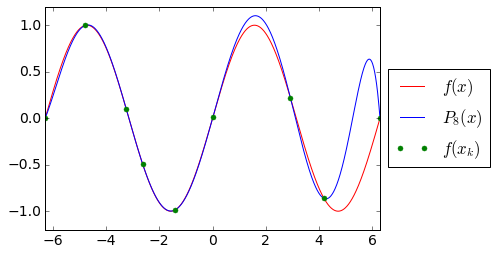

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 14})

n = 9
h = 0.2 + np.random.rand(n)
x = np.cumsum(h)
x -= x[0]
x /= x[-1]
a = 2 * np.pi
x = a * (2 * x - 1)

def f(x):
    return np.sin(x)
fv = f(x)

W = np.empty((n, n))
for k in range(n):
    W[:, k] = x**k
c = np.linalg.solve(W, fv)

X = np.linspace(-a, a, 1000)
P = lambda x: np.polyval(list(reversed(c)), x)

plt.plot(X, f(X), 'r', label='$f(x)$')
plt.plot(X, P(X), 'b', label='$P_{%d}(x)$' % (n-1))
plt.plot(x, fv, 'g.', ms=10, label='$f(x_k)$')
plt.axis([-a, a, -1.2, 1.2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Способы построение интерполяционного многочлена
Существуют способы построение интерполяционного многочлена, не требующие решения системы линейных уравнений
* Интерполяционный многочлен в форме Ньютона
* Интерполяционный многочлен в форме Лагранжа

При этом интерполяционный многочлен остается одним и тем же (он единственный!), изменяется лишь форма его представления.

### Интерполяционный многочлен в форме Ньютона
Интерполяционный многочлен в форме Ньютона имеет вид
$$
P_{n-1}(x) = f(x_1) + f(x_1, x_2) (x - x_1) + f(x_1, x_2, x_3) (x - x_1) (x - x_2) + \dots \\
\dots + f(x_1, \dots, x_n) (x - x_1) \cdots (x - x_{n-1})
$$
Величины $f(x_1, x_2), f(x_1, x_2, x_3), \dots$ называются *разделенными разностями*.

### Разделенные разности
Порядком разделенной разности $f(x_i, \dots, x_{i+k})$ называется число аргументов без единицы ($k$). Разделенные разности нулевого порядка $f(x_i)$ совпадают со значениями функции $f(x_i)$ (путаницы в обозначениях нет)

Разделенная разность порядка $k+1$ определяется через разделенные разности порядка $k$:
$$
f(\color{red}{x_{i}}, \dots, \color{blue}{x_{i+k+1}}) = \frac{f(x_{i+1}, \dots, \color{blue}{x_{i+k+1}}) - f(\color{red}{x_{i}}, \dots, x_{i+k})}{\color{blue}{x_{i+k+1}} - \color{red}{x_{i}}}
$$

Разделенные разности удобно вычислять в таблице

$x_i$ | $f(x_i)$ | $f(x_i, x_{i+1})$ | $f(x_i, x_{i+1}, x_{i+2})$
------|----------|-------------------|---------------------------
$1$ | $\color{red}{1}$ | |
| | $\color{green}{2}$|
$2$ | $3$ | | $\color{blue}{-1}$
| | $-1$|
$4$ | $1$ | |

$$
P(x) = \color{red}{1} + \color{green}{2} (x - 1) \color{blue}{-1} (x-1)(x-2)
$$

In [108]:
def divided_differences(x, f):
    n = len(x);
    F = np.empty((n, n))
    F[:, 0] = f
    for k in range(1, n):
        F[0:n-k, k] = (F[1:n-k+1, k-1] - F[0:n-k, k-1]) / (x[k:] - x[:-k])
    return F # F[i, k] = f(x_i, x_{i+1}, ..., x_{i+k})

x = np.array([1, 2, 4, 5])
f = np.array([1, 3, 1, 3])
F = divided_differences(x, f)
print(F)

[[ 1.   2.  -1.   0.5]
 [ 3.  -1.   1.   0. ]
 [ 1.   2.   0.   0. ]
 [ 3.   0.   0.   0. ]]


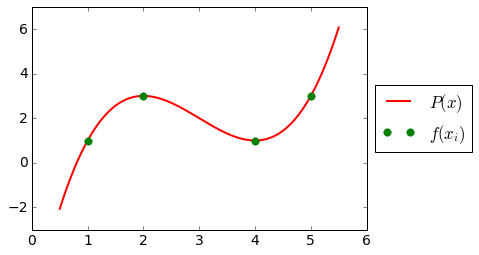

In [116]:
def evaluate(x, F, x0):
    n = len(x);
    P = 0;
    xprod = 1.0 # (x - x1) (x - x2) ... (x - xi)
    for i in range(n):
        P += F[0, i] * xprod
        xprod *= (x0 - x[i])
    return P

X = np.linspace(0.5, 5.5, 1000)
plt.plot(X, evaluate(x, F, X), 'r', lw=2, label='$P(x)$')
plt.plot(x, f, 'g.', ms=15, label='$f(x_i)$')
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

### Интерполяционные многочлены в форме Лагранжа
Рассмотрим вспомогательную задачу. Построим интерполяционный многочлен для функции
$f_k(x_i) = \delta_{ik} = \begin{cases}1, &x_i = x_k\\ 0, &x_i \neq x_k\end{cases}$

Этот многочлен имеет вид
$$
\ell_k(x) = \frac{(x - x_1)\cdots(x-x_{k-1})(x-x_{k+1}) \cdots (x-x_n)}{
(x_k - x_1)\cdots(x_k-x_{k-1})(x_k-x_{k+1}) \cdots (x_k-x_n) 
} = \prod_{i\neq k}\frac{x-x_i}{x_k-x_i}
$$
Данный многочлен называется *базисным интерполяционным многочленом Лагранжа*

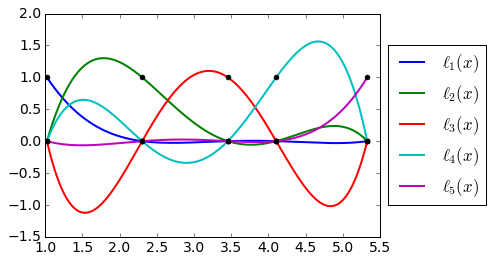

In [132]:
n = 5
x = np.cumsum(0.5 + np.random.rand(n))
X = np.linspace(x[0], x[-1], 1000)
for i in range(n):
    v = np.eye(n)[i]
    F = divided_differences(x, v)
    plt.plot(X, evaluate(x, F, X), label='$\ell_{%d}(x)$' % (i+1), lw=2)
    plt.plot(x, v, 'k.', ms=10)
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

### Интерполянт в форме Лагранжа
После построения базисных интерполяционных многочленов интерполянт записывается особенно просто
$$
P(x) = \sum_{k=1}^n f(x_k)\ell_k(x)
$$
Хорошо видно, что от $x$ зависят лишь базисные многочлены, а от $f$ &mdash; лишь коэффициенты разложения по этим многочленам.

### Ошибка интерполяции
Важный вопрос &mdash; насколько $P(x)$ и $f(x)$ различаются? Очевидно, что в узлах $x_k$ они совпадают, но что происходит в промежутках?

Верна теорема
$$
|f(x) - P(x)| \leqslant \frac{|f^{(n)}(\xi)|}{n!} |\omega(x)|,
$$
где
$$
\omega(x) = (x - x_1) (x - x_2) \cdots (x - x_n).
$$

$$
\varepsilon_\text{метод} = |f(x) - P(x)| \leqslant \frac{|f^{(n)}(\xi)|}{n!} |\omega(x)|,\\
\omega(x) = (x - x_1) (x - x_2) \cdots (x - x_n),
$$
Первый сомножитель можно оценить как $\frac{M_n}{n!}$, то есть величиной, зависящей лишь от функции, а второй сомножитель $|\omega(x)|$ зависит лишь от расположения узлов, но не от самой функции.

### Феномен Рунге
Оказывается, что увеличение количества узлов интерполяции не гарантирует улучшения приближения функции. Пример
$$
f(x) = \frac{1}{1 + 25 x^2}, \qquad x \in [-1, 1]
$$
Будем проводить интерполяцию этой функции на равномерной сетке с числом узлов $n = 5, 10, 15, 20$

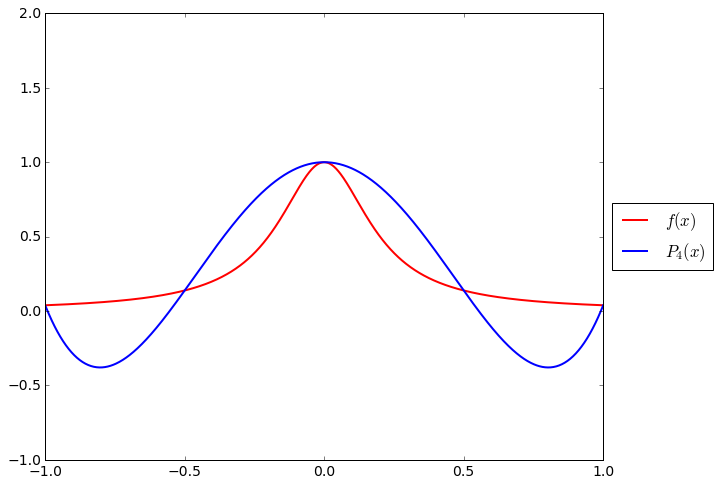

In [155]:
def runge(x):
    return 1 / (1 + 25 * x**2)

X = np.linspace(-1, 1, 1000)

plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 5
x = np.linspace(-1, 1, n)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

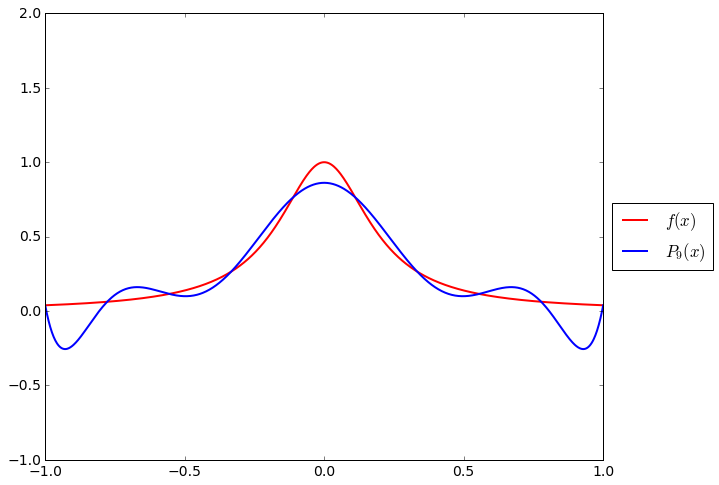

In [154]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 10
x = np.linspace(-1, 1, n)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

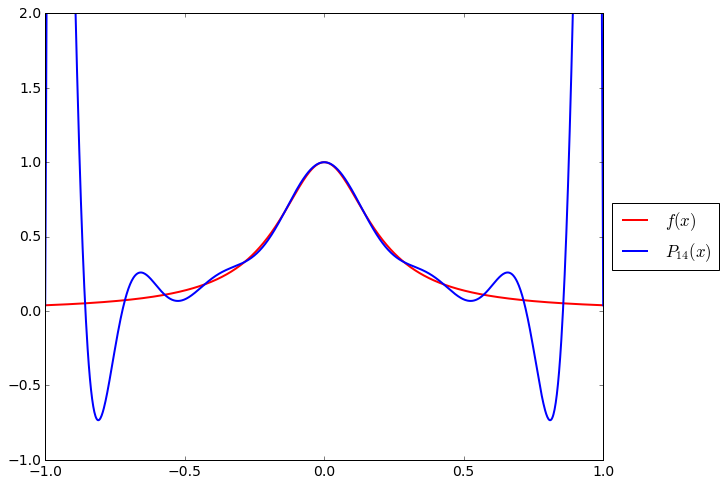

In [152]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 15
x = np.linspace(-1, 1, n)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

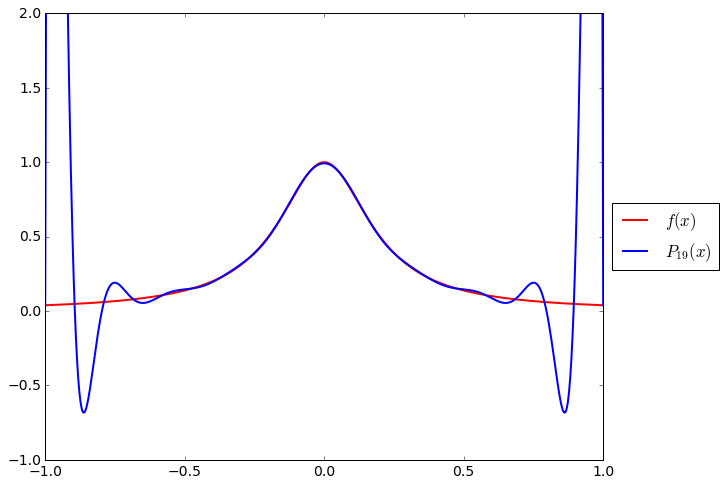

In [153]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 20
x = np.linspace(-1, 1, n)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

### Оптимальное расположение узлов
Изучим, насколько сильно можно уменьшить ошибку интерполяции, если грамотно выбирать узлы интерполяции.

Рассмотрим функцию $\omega(x) = (x - x_1) \cdots (x - x_n)$. На равномерной сетке она сильно растет к краям отрезка:
    

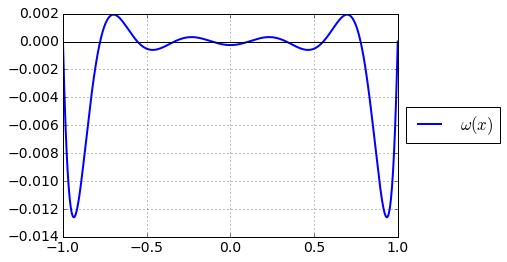

In [164]:
X = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 10)
omega = (X - x[0]);
for i in range(1, len(x)):
    omega *= (X - x[i])
plt.plot(X, omega, 'b', lw=2, label='$\omega(x)$')
plt.plot(X, 0*X, 'k')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1,.5)); plt.show()

### Чебышевские узлы
Если выбрать узлы интерполяции в корнях многочлена Чебышева
$$
x_k = \frac{a+b}{2} + \frac{b-a}{2} \cos\left(\frac{2k-1}{2n}\pi\right),
$$
то функция $\omega(x)$ ведет себя как многочлен Чебышева:

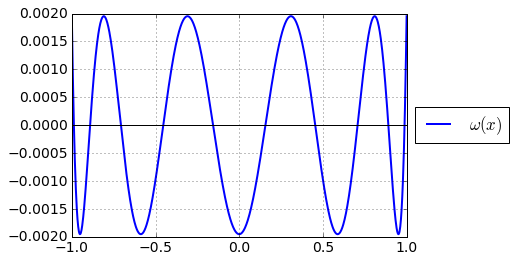

In [165]:
X = np.linspace(-1, 1, 1000)
x = np.cos((2*np.arange(10)+1) / 20 * np.pi)
omega = (X - x[0]);
for i in range(1, len(x)):
    omega *= (X - x[i])
plt.plot(X, omega, 'b', lw=2, label='$\omega(x)$')
plt.plot(X, 0*X, 'k')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1,.5)); plt.show()

Доказано, что в случае выбра Чебышевских узлов интерполяции последовательность интерполяционных многочленов $P_n(x)$ будет сходиться к $f(x)$ *равномерно*, если $f(x)$ имеет ограниченную первую производную.

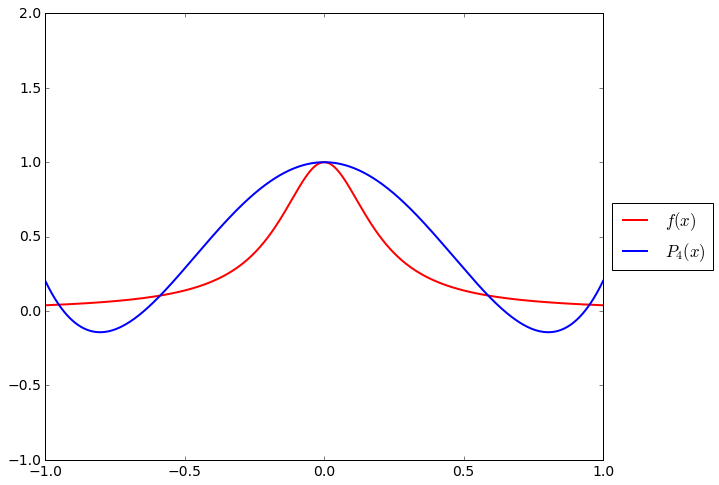

In [170]:
def runge(x):
    return 1 / (1 + 25 * x**2)

X = np.linspace(-1, 1, 1000)

plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 5
x = np.cos((np.arange(n)*2+1) / (2*n) * np.pi)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

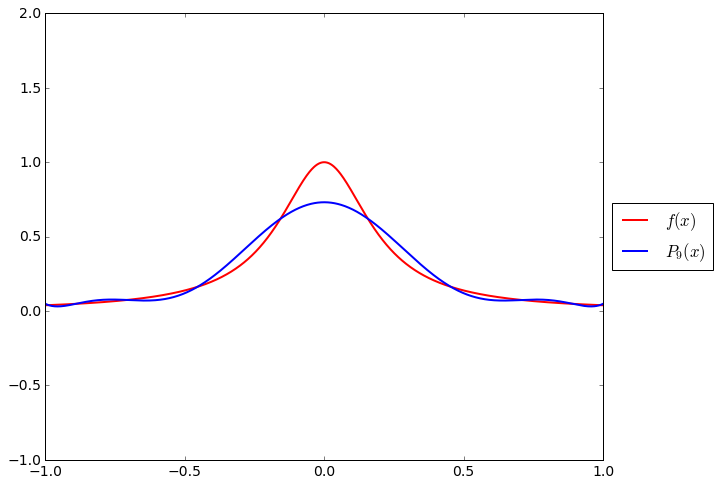

In [171]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 10
x = np.cos((np.arange(n)*2+1) / (2*n) * np.pi)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

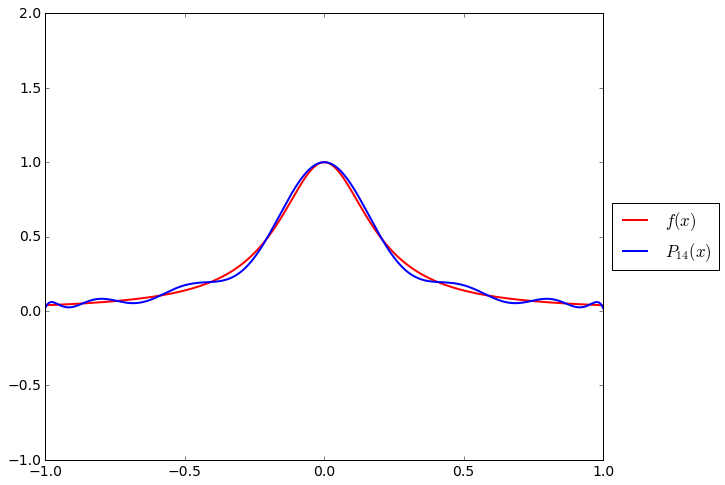

In [172]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 15
x = np.cos((np.arange(n)*2+1) / (2*n) * np.pi)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

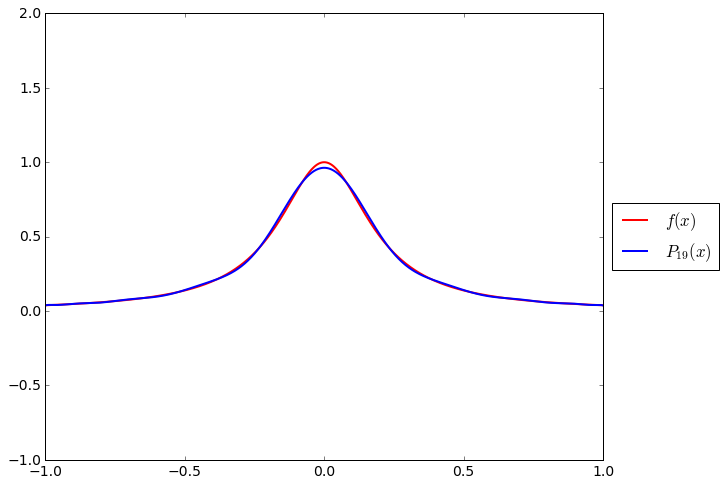

In [173]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 20
x = np.cos((np.arange(n)*2+1) / (2*n) * np.pi)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()